<a href="https://colab.research.google.com/github/MoffatKirui/w4Moffat/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_Moffat_Kirui_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Dataset

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
#loading data set 
autolib_url = "http://bit.ly/DSCoreAutolibDataset"
df= pd.read_csv(autolib_url)
df.head()

Postal code      date  ...  Slots_freed_sum  Slots_taken_sum
0        75001  1/1/2018  ...               22               20
1        75001  1/2/2018  ...               23               22
2        75001  1/3/2018  ...               27               27
3        75001  1/4/2018  ...               25               21
4        75001  1/5/2018  ...               18               20

[5 rows x 13 columns]

## Exploratory Data AnaLysis

In [ ]:
# installing pandas profiling
pip install -U pandas-profiling

     |████████████████████████████████| 245kB 7.9MB/s 
     |████████████████████████████████| 3.2MB 10.9MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 1.1MB 37.5MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 296kB 53.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=7a0b17a3d67bf2ba408ab94f64474c34976db37f2c86559dc39e12b910a3a25a
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=b9fdeac90207b5c5f09a44e1101cea00d4e84422f418c6d0a53ce60e60f47fd5
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but 

In [ ]:
# generating profile report on the autolib dataset
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof

In [ ]:
# finding the top two postal codes with the most Bluecars taken
df.groupby('Postal code')['BlueCars_taken_sum'].sum().sort_values(ascending=False)

Postal code
75015    139925
75016    123287
75017    114581
75013     84489
75019     81973
          ...  
93150       794
94100       749
93370       558
93440       520
93390       305
Name: BlueCars_taken_sum, Length: 104, dtype: int64

## Testing for normality in the two variable distribution

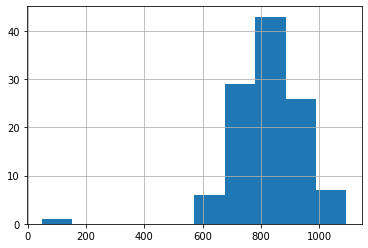

In [ ]:
# plotting histogram for bluecars taken on weekdays for postal code 75015
x=df.BlueCars_taken_sum.loc[(df['Postal code']==75015) & (df['day_type']=='weekday')]
x.hist()

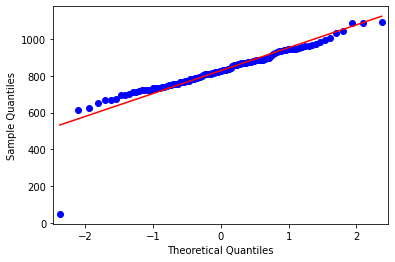

In [ ]:
# testing normality using Q-Q plot
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(x, line='s')
pyplot.show()

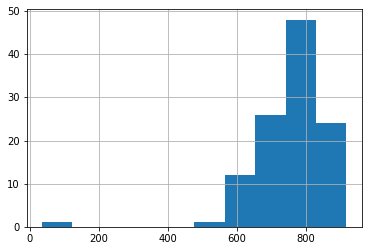

In [ ]:
# testing normality using Q-Q plot
# plotting histogram for bluecars taken on weekdays for postal code 75016
y=df.BlueCars_taken_sum.loc[(df['Postal code']==75016) & (df['day_type']=='weekday')]
y.hist()

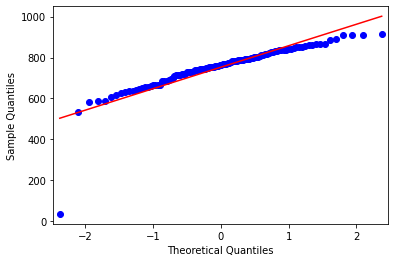

In [ ]:
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(y, line='s')
pyplot.show()

## Hypothesis Testing

In general, the null hypothesis will state that the two populations being tested have no statistically significant difference. The alternate hypothesis will state that there is one present.

	* Null hypothesis : Average of blue cars taken in postal codes 75015 and 75016 is the same

  * Alternative hypothesis: Average of blue cars taken in postal codes 75015 and 75016 is different.


### Getting samples

In [ ]:
import random
x1=x.sample(n = 30, replace="False")
y1=y.sample(n = 30, replace="False")

### calculating test statistic and p value

In [ ]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=x1, b=y1, equal_var=False)

Ttest_indResult(statistic=4.3863880874270516, pvalue=5.490851489784188e-05)

### Interpret the results.
The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.00005) is less than alpha = 0.05, we reject the null hypothesis of the test. We have sufficient evidence to say that the mean number of blue cars taken on weekdays between the two populations is different.